In [18]:
import numpy as np
import qutip as qu
import matplotlib.pyplot as plt

# definition of the hamiltonian of the 2 level system

$$
H = \begin{pmatrix}
    0 & \Omega \\
    \Omega & \Delta \\
    \end{pmatrix}
$$

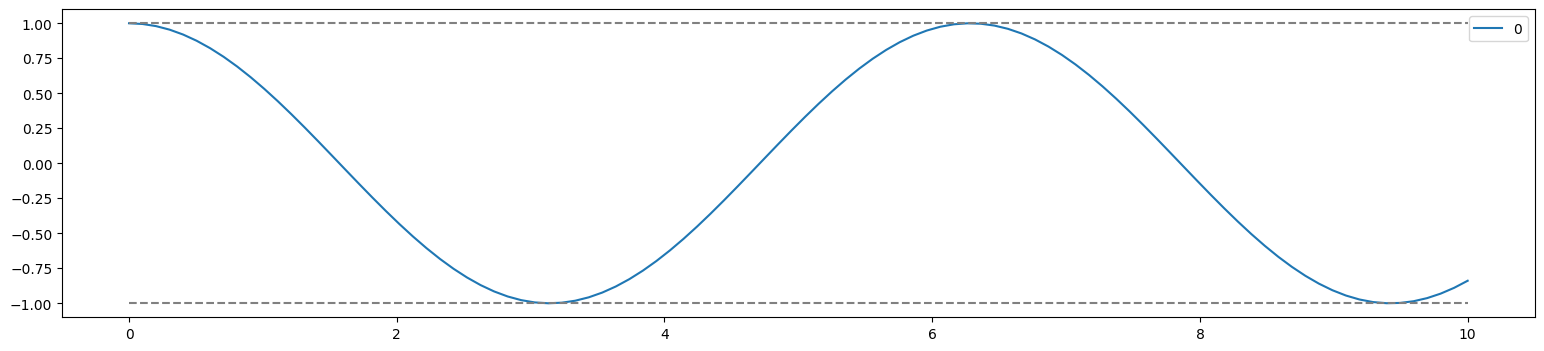

In [19]:
omega = 1
delta = 0
time = 10
n_points = 100

H = qu.Qobj([
    [0, omega/2],
    [omega/2, -delta]
])

psi_0 = qu.basis(2,0)
observables = [qu.Qobj([[1,0],
                  [0,-1]])]

res = qu.sesolve(H, psi_0, tlist=np.linspace(0,time, n_points), e_ops=observables)

plt.figure(figsize=[19,4])

for i in range(len(observables)):
    plt.plot(res.times, res.expect[i], label="%d"%i)
plt.legend()
plt.plot([0,time],[1,1], "--", color="gray")
plt.plot([0,time],[-1,-1], "--", color="gray")
#plt.ylim([-0.05,1.05])
#plt.xlim([6,7])
plt.show()

## Two level evolution with change of phase of the driving light

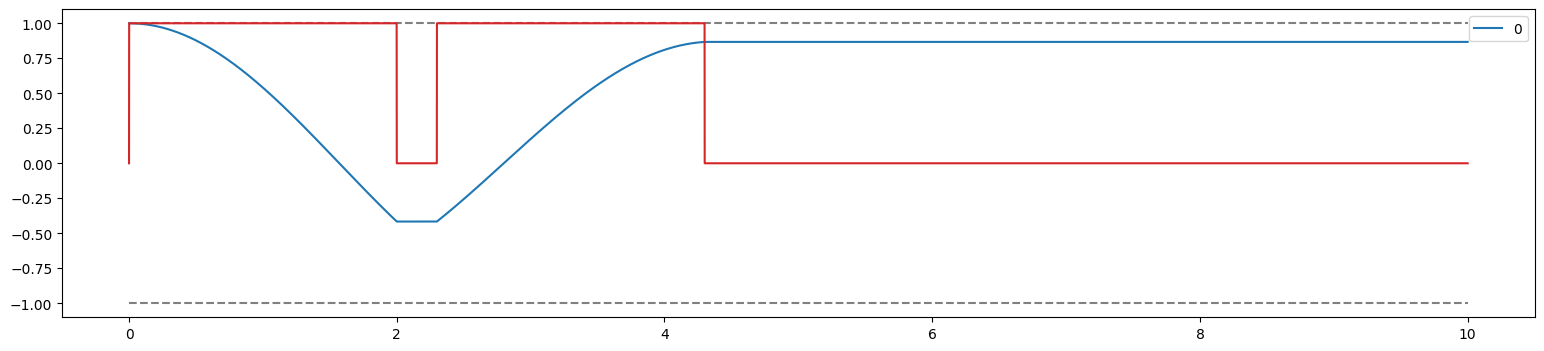

In [46]:
omega = 1
delta = 0
time = 10
eps = 10
tau = 2
delay = 0.3
n_points = 10000

H = qu.Qobj([
    [0, 0],
    [0, -delta]
])

H0 = qu.Qobj([
    [0, omega/2],
    [omega/2, 0]
])

H1 = qu.Qobj([
    [0, omega/2*np.exp(1j*eps)],
    [omega/2*np.exp(-1j*eps), 0]
])

def H_coeff(t, args):
    return 1

def H0_coeff(t, args):
    if 0 < t < tau:
        return 1
    return 0

def H1_coeff(t, args):
    if tau+delay < t < 2*tau + delay:
        return 1
    return 0

psi_0 = qu.basis(2,0)
observables = [qu.Qobj([[1,0],
                  [0,-1]])]
times = np.linspace(0,time, n_points)

res = qu.mesolve([[H, H_coeff], [H0, H0_coeff], [H1, H1_coeff]], psi_0, tlist=times, e_ops=observables)

plt.figure(figsize=[19,4])

for i in range(len(observables)):
    plt.plot(res.times, res.expect[i], label="%d"%i)
plt.legend()
plt.plot([0,time],[1,1], "--", color="gray")
plt.plot([0,time],[-1,-1], "--", color="gray")
plt.plot(times, [np.max([H0_coeff(_t, args=0), H1_coeff(_t, args=0)]) for _t in times], color="tab:red")

#plt.ylim([-0.05,1.05])
#plt.xlim([6,7])
plt.show()

# Raman system

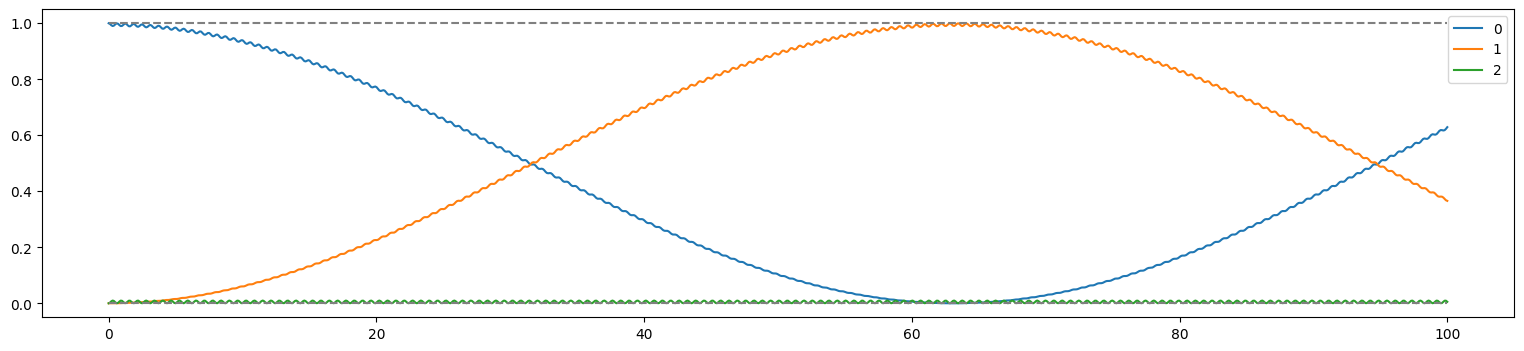

In [21]:
omega_1 = 1
omega_2 = 1
delta = 10
time = 100
n_points = 1000

H = qu.Qobj([
    [0, 0, omega_1/2],
    [0, 0, omega_2/2],
    [omega_1/2, omega_2/2, delta]
])

psi_0 = qu.basis(3,0)

observables = [ qu.Qobj([[1,0,0],
                  [0,0,0],
                  [0,0,0]]), 
                qu.Qobj([[0,0,0],
                  [0,1,0],
                  [0,0,0]]),
                qu.Qobj([[0,0,0],
                  [0,0,0],
                  [0,0,1]]),
                ]

res = qu.sesolve(H, psi_0, tlist=np.linspace(0,time, n_points), e_ops=observables)

plt.figure(figsize=[19,4])

for i in range(len(observables)):
    plt.plot(res.times, res.expect[i], label="%d"%i)
plt.legend()
plt.plot([0,time],[1,1], "--", color="gray")
plt.plot([0,time],[0,0], "--", color="gray")
#plt.ylim([-0.05,1.05])
#plt.xlim([6,7])
plt.show()

# Raman and Isolation

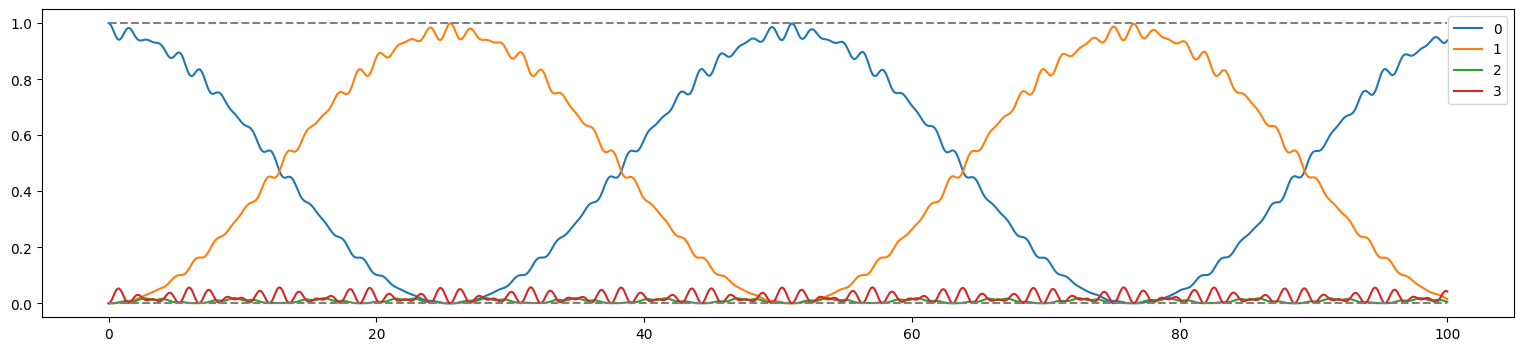

In [22]:
omega_1 = 1
omega_2 = 1
omega_3 = 1
delta = 4
time = 100
n_points = 1000

H = qu.Qobj([
    [0, 0, 0, omega_1/2],
    [0, 0, 0, omega_2/2],
    [0, 0, delta, omega_3/2],
    [omega_1/2, omega_2/2, omega_3/2, delta]
])

psi_0 = qu.basis(4,0)

observables = [ qu.Qobj([
                  [1,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0]]), 
                qu.Qobj([
                  [0,0,0,0],
                  [0,1,0,0],
                  [0,0,0,0],
                  [0,0,0,0]]),
                qu.Qobj([
                  [0,0,0,0],
                  [0,0,0,0],
                  [0,0,1,0],
                  [0,0,0,0]]),
                qu.Qobj([
                  [0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,1]]),
                ]

res = qu.sesolve(H, psi_0, tlist=np.linspace(0,time, n_points), e_ops=observables)

plt.figure(figsize=[19,4])

for i in range(len(observables)):
    plt.plot(res.times, res.expect[i], label="%d"%i)
plt.legend()
plt.plot([0,time],[1,1], "--", color="gray")
plt.plot([0,time],[0,0], "--", color="gray")
#plt.ylim([-0.05,1.05])
#plt.xlim([6,7])
plt.show()

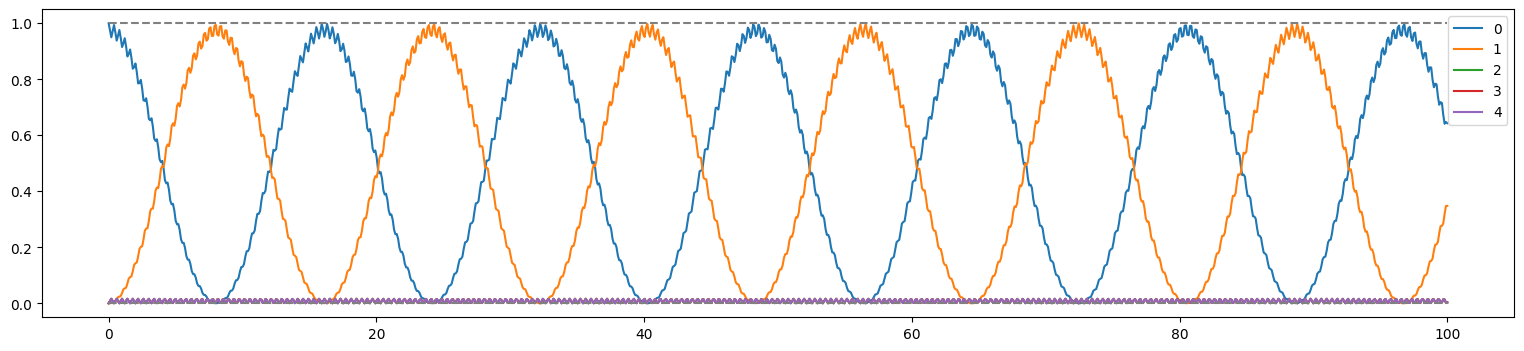

In [23]:
omega_02 = 1
omega_03 = 1
omega_04 = 1
omega_12 = 1
omega_13 = 1
omega_14 = 1

delta_2 = 15
delta_3 = 15
delta_4 = 15

time = 100
n_points = 1000

H = qu.Qobj([
    [0, 0, omega_02, omega_03, omega_04],
    [0, 0, omega_12, omega_13, omega_14],
    [omega_02, omega_12, delta_2,  0, 0],
    [omega_03, omega_13, 0 , delta_3, 0],
    [omega_04, omega_14, 0 , 0, delta_4],
])

n_states = len(H.diag())

psi_0 = qu.basis(n_states,0)

observables = [qu.basis(n_states,i)@qu.basis(n_states,i).dag() for i in range(n_states)]

res = qu.mesolve(H, psi_0, tlist=np.linspace(0,time, n_points), e_ops=observables)

plt.figure(figsize=[19,4])

for i in range(len(observables)):
    plt.plot(res.times, res.expect[i], label="%d"%i)
plt.legend()
plt.plot([0,time],[1,1], "--", color="gray")
plt.plot([0,time],[0,0], "--", color="gray")
#plt.ylim([-0.05,1.05])
#plt.xlim([6,7])
plt.show()

In [24]:
qu.basis(2,1)@qu.basis(2,0).dag()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0. 0.]
 [1. 0.]]

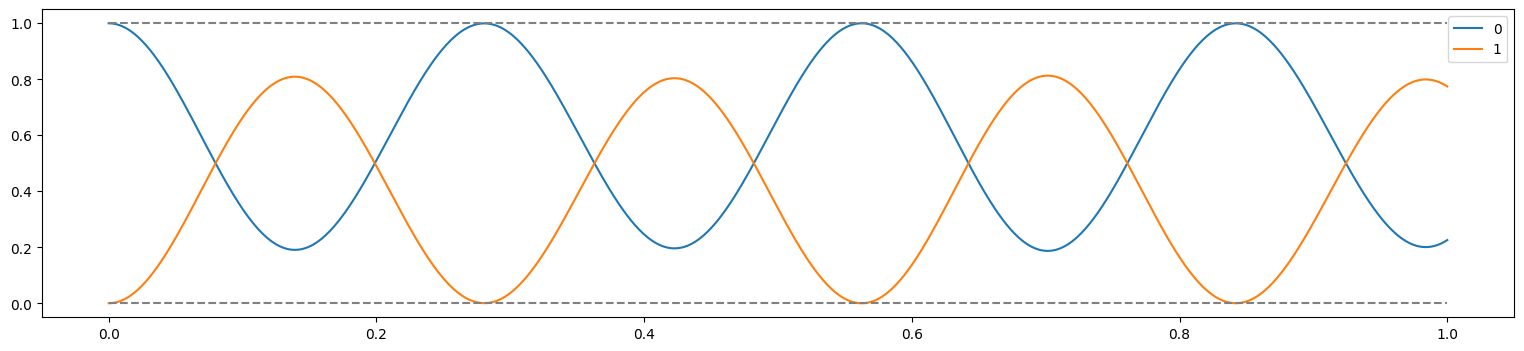

In [25]:
import qutip as qu
import numpy  as np

omega_1 = 10
omega_2 = .2

delta_1 = 10
delta_2 = 0

time = 1
n_points = 1000

H_0 = qu.Qobj([
    [0, omega_1],
    [omega_1, delta_1]
])

H_1 = qu.basis(2,0)@qu.basis(2,1).dag()

H_2 = qu.basis(2,1)@qu.basis(2,0).dag()

def H1_coeff(t):
    return omega_2*np.e**(1j*(delta_1-delta_2)*t)

def H2_coeff(t):
    return omega_2*np.e**(-1j*(delta_1-delta_2)*t)

H = [H_0, [H_1, H1_coeff], [H_2, H2_coeff]]

n_states = len(H_0.diag())

psi_0 = qu.basis(n_states,0)

observables = [qu.basis(n_states,i)@qu.basis(n_states,i).dag() for i in range(n_states)]

res = qu.mesolve(H, psi_0, tlist=np.linspace(0,time, n_points), e_ops=observables)

plt.figure(figsize=[19,4])

for i in range(len(observables)):
    plt.plot(res.times, res.expect[i], label="%d"%i)
plt.legend()
plt.plot([0,time],[1,1], "--", color="gray")
plt.plot([0,time],[0,0], "--", color="gray")
#plt.ylim([-0.05,1.05])
#plt.xlim([6,7])
plt.show()